# 欠拟合  过拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.uniform(low=-3.0, high=3.0, size=100)
y = 0.5 * (x**2) + x + 2 + np.random.normal(0, 1, size=100)
X = x.reshape(-1,1)

# 1.欠拟合

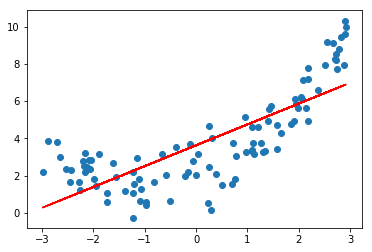

In [2]:
from sklearn.linear_model import LinearRegression
Lin = LinearRegression()
Lin.fit(X,y)
y_predict = Lin.predict(X)
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

# 2.过拟合

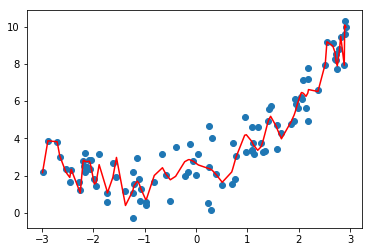

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler
def polyRegression(degree):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("lin_reg", LinearRegression())
            ])
poly_reg100 = polyRegression(degree=100)# degree 过大会导致过拟合
poly_reg100.fit(X,y)
y_predict100 = poly_reg100.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict100[np.argsort(x)], color='r')
plt.show()

# 3.既不过拟合，也不欠拟合

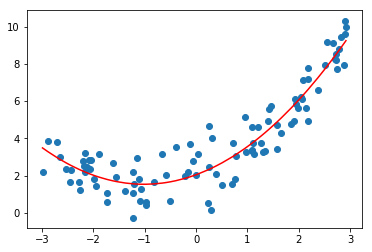

In [4]:
poly_reg = polyRegression(degree=2)   
poly_reg.fit(X,y)
y_predict2 = poly_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

# 4.计算欠拟合和过拟合的mean_square 均方误差

In [5]:
from sklearn.metrics import mean_squared_error
m1 = mean_squared_error(y, y_predict)
m1

2.548232263582698

In [6]:
m2 = mean_squared_error(y, y_predict2)
m2

0.8386607046535048

In [7]:
m100 = mean_squared_error(y, y_predict100)
m100

0.5129392000724102

可以看到，过拟合的均方误差比欠拟合的误差小的多，甚至比正常拟合的mean_square也小一半,   
但是过拟合不具有泛化能力,不可取。

# 除了mean_square 也可以用score(R_square)来评估预测误差

# 5.欠拟合与过拟合测试数据集的准确率

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

#欠拟合
Lin.fit(X_train,y_train)
y_test_predict = Lin.predict(X_test)
y_test_mean_squared = mean_squared_error(y_test, y_test_predict)
y_test_mean_squared 

2.4656341172599094

In [12]:
#过拟合
poly_reg100.fit(X_train, y_train)
y_test_predict100 = poly_reg100.predict(X_test)
y_test_mean_squared100 = mean_squared_error(y_test, y_test_predict100)
y_test_mean_squared100 

8.843949914286181e+22

In [13]:
#既不欠拟合，也不过拟合
poly_reg.fit(X_train,y_train)
y_test_predict2 = poly_reg.predict(X_test)
y_test_mean_squared2 = mean_squared_error(y_test, y_test_predict2)
y_test_mean_squared2 

1.097416301465218

# 由上结果可知,既不过拟合,也不欠拟合时测试数据集的预测均方误差最小,即此时具有最好的泛化能力